In [25]:
#loading libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

In [26]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
    

--2020-03-11 16:39:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-03-11 16:39:02 (13.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [27]:
#loading data from above csv file and displaying head
loan = pd.read_csv('loan_train.csv')
loan.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [28]:

# converting to date time object for  preprocessing and Data Visualization further
loan['due_date'] = pd.to_datetime(loan['due_date'])
loan['effective_date'] = pd.to_datetime(loan['effective_date'])
loan.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [29]:
#checking for number of columns and rows in above loan data
loan.shape

(346, 10)

In [45]:
# Data Visualization and Preprocessing

#step one would be data visualization to gain clarity about loan data 

loan['loan_status'].value_counts()

# installing seaborn 
!conda install -c anaconda seaborn -y

import seaborn as sb


Solving environment: done

# All requested packages already installed.



In [ ]:
#loans paid off and defaulted based on principal
#bins = np.linspace(loan.Principal.min(), loan.Principal.max(), 10)
#gph = sb.FacetGrid(loan, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
#gph.map(plt.hist, 'Principal', bins=bins, ec="k")

#gph.axes[-1].legend()
#plt.show()

In [ ]:
#loans paid off and defaulted based on age

#gph = sb.FacetGrid(loan, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
#gph.map(plt.hist, 'age', bins=bins, ec="k")

#gph.axes[-1].legend()
#plt.show()

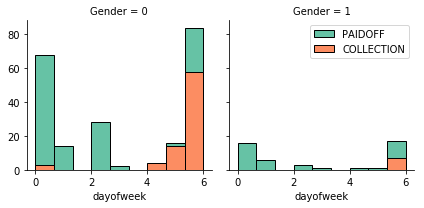

In [46]:
#Preprocessing:Feature selection/extraction
loan['dayofweek'] = loan['effective_date'].dt.dayofweek
bins = np.linspace(loan.dayofweek.min(), loan.dayofweek.max(), 10)
gph = sb.FacetGrid(loan, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
gph.map(plt.hist, 'dayofweek', bins=bins, ec="k")
gph.axes[-1].legend()
plt.show()
# so now we see that people receiving loans at end of week donot repay , we can include this in our loan data 

In [47]:
#used one time to binary represent gender
loan['weekend'] = loan['dayofweek'].apply(lambda y: 1 if (y>3)  else 0)
loan.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [58]:
loan.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

In [56]:

loan.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [59]:

Feature = loan[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(loan['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [60]:
#preparing the train/test sets
x = Feature
x[0:10]



,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
5,1000,30,36,0,1,0,0,1
6,1000,30,28,0,1,0,0,1
7,800,15,26,0,1,0,0,1
8,300,7,29,0,1,0,0,1
9,1000,15,39,0,1,0,1,0


In [61]:

y = pd.get_dummies(loan['loan_status'])['PAIDOFF'].values
y[0:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [62]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:8]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769,  0.8391575 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.81902922, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

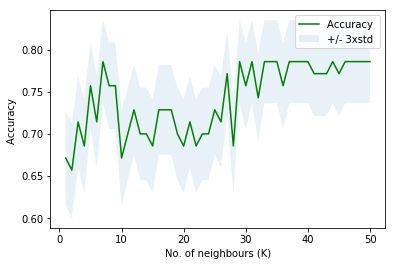

The best accuracy was with 0.7857142857142857 with K= 7


In [63]:
#1 KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    y_pred=knnmodel.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)

plt.ylabel('Accuracy ')
plt.xlabel('No. of neighbours (K)')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with K=", mean_acc.argmax()+1)

In [64]:
#2Decision tree
from sklearn.tree import DecisionTreeClassifier as dtc

dtreemodel = dtc(criterion="entropy", max_depth = 4)
dtreemodel.fit(x_train,y_train)

y_pred=dtreemodel.predict(x_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy

0.6142857142857143

In [77]:
#3Logisitic Regression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrmodel=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
y_pred=lrmodel.predict(x_test)
print(y_pred)
print(lrmodel.predict_proba(x_test))


[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
[[0.5034238  0.4965762 ]
 [0.45206111 0.54793889]
 [0.30814132 0.69185868]
 [0.34259428 0.65740572]
 [0.32025894 0.67974106]
 [0.31680537 0.68319463]
 [0.48830185 0.51169815]
 [0.47823073 0.52176927]
 [0.34259428 0.65740572]
 [0.4934056  0.5065944 ]
 [0.33806706 0.66193294]
 [0.49662231 0.50337769]
 [0.24891907 0.75108093]
 [0.3419095  0.6580905 ]
 [0.43751789 0.56248211]
 [0.25760497 0.74239503]
 [0.52357188 0.47642812]
 [0.30450278 0.69549722]
 [0.50166363 0.49833637]
 [0.3195971  0.6804029 ]
 [0.44276988 0.55723012]
 [0.49410185 0.50589815]
 [0.51350333 0.48649667]
 [0.47203498 0.52796502]
 [0.40944694 0.59055306]
 [0.50846442 0.49153558]
 [0.51098415 0.48901585]
 [0.37457647 0.62542353]
 [0.50418423 0.49581577]
 [0.25299635 0.74700365]
 [0.46824113 0.53175887]
 [0.46024688 0.53975312]
 [0.46206917 0.53793083]
 [0.48402425 0.51597575]
 [0.388

In [78]:

metrics.accuracy_score(y_test,y_pred)

0.6857142857142857

In [79]:
#4 SVM
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(x_train,y_train)

y_pred=svmmodel.predict(x_test)
y_pred

metrics.accuracy_score(y_test,y_pred)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7428571428571429

In [84]:
# accuracy of each classifier using F1 score, Jaccard Index, log loss

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
#loading data test set for evaluation   
test_loan = pd.read_csv('loan_test.csv')
test_loan.head()    
    

--2020-03-11 17:04:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-03-11 17:04:17 (275 MB/s) - ‘loan_test.csv’ saved [3642/3642]



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [102]:
test_loan['effective_date']=pd.to_datetime(test_loan['effective_date'])
test_loan['dayofweek'] = test_loan['effective_date'].dt.dayofweek
test_loan['weekend'] = test_loan['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
Feature_test = test_loan[['Principal','terms','age','Gender','weekend']]
test_loan['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_loan.head()


Feature_test = pd.concat([Feature_test,pd.get_dummies(test_loan['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,female,0,1,0,0
1,300,7,35,male,1,0,0,0
2,1000,30,43,female,1,0,1,0
3,1000,30,26,male,1,0,0,1
4,800,15,29,male,1,1,0,0


In [112]:
x_testset=Feature_test
y_testset=pd.get_dummies(test_loan['loan_status'])['PAIDOFF'].values

x_testset
y_testset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [113]:

y_pred_knn=knnmodel.predict(x_testset)
y_pred_dt=dtmodel.predict(x_testset)
y_pred_svm=svmmodel.predict(x_testset)
y_pred_lr=lrmodel.predict(x_testset)
y_pred_lr_proba=lrmodel.predict_proba(x_testset)

ValueError: could not convert string to float: 'female'

In [99]:
print(f1_score(y_testset,y_pred_knn))
print(f1_score(y_testset,y_pred_dt))
print(f1_score(y_testset,y_pred_svm))
print(f1_score(y_testset,y_pred_lr))

NameError: name 'y_pred_knn' is not defined

In [105]:
print(jaccard_similarity_score(y_testset,y_pred_knn))
print(jaccard_similarity_score(y_testset,y_pred_dt))
print(jaccard_similarity_score(y_testset,y_pred_svm))
print(jaccard_similarity_score(y_testset,y_pred_lr))

NameError: name 'y_pred_knn' is not defined

In [109]:

LR_log_loss=log_loss(y_testset,y_pred_lr_proba)
LR_log_loss

NameError: name 'y_pred_lr_proba' is not defined